# Assignment 8: EEG Analysis
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023

# Objectives

Upon completion of this assignment, the student will have:

A. Read in preprocessed EEG data.

B. Performed an analysis to compare Auditory versus Visual processing during the Oddball task.


# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A08_EEG_Analysis_mst3k).

## Details

The goal of this assignment is visualize neural activity from a single-subject analysis of EEG data from the Oddball task. The task involved presenting a series of stimuli to the participant and they had to press a button with each stimulus, depending on what was presented. Each block of stimuli were either 

We have preprocessed data from one subject in class (see the lesson notebook titled `13_EEG.ipynb`). For this analysis, you will make use of the Epochs (windows of time) extracted around each event to compare neural processing of auditory versus visual stimuli. 

In order to perform the analysis you will need to download the preprocessed epoch data file `rof07_odd-epo.fif` from this link:

https://virginia.box.com/s/lx0hohvaqt8f98i0345535g457qluiv3

and put it in the same directory as this jupyter notebook.
  
* ***When you are done with the analysis, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on Canvas.***  

In [33]:
# Load some required modules
# If you get an import error, make sure you are using the correct
# virtual environment and the libraries are installed
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import mne


In [34]:
import os
os.chdir('/Users/Samantha/Desktop')

In [35]:
# load in the epochs of data
epochs = mne.read_epochs('rof07_odd-epo.fif')
epochs

Reading /Users/Samantha/Desktop/rof07_odd-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     995.00 ms
        0 CTF compensation matrices available
Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated


Number of events,400
Events,auditory/common: 160auditory/rare: 40visual/common: 160visual/rare: 40
Time range,-0.200 – 0.995 sec
Baseline,-0.200 – 0.000 sec


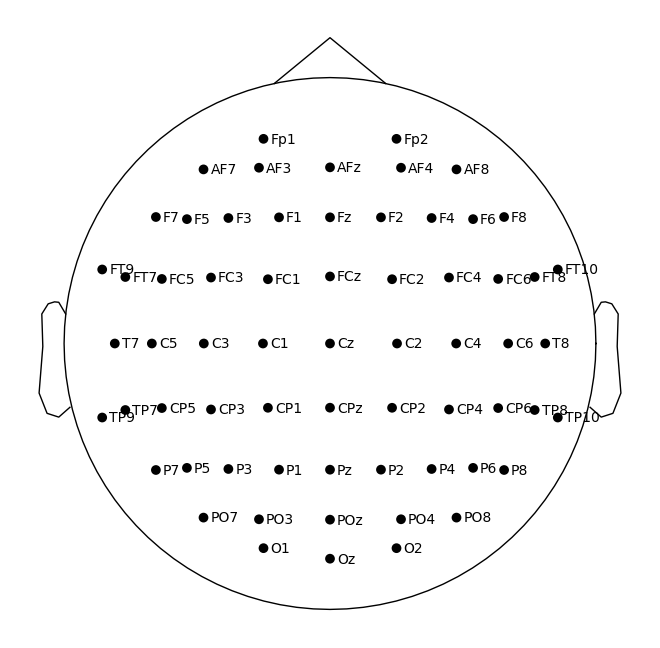

In [24]:
# plot the electrode locations for future reference
epochs.get_montage().plot();

In [25]:
# extract averages for the auditory and visual epochs
# we can average all the events for a particular condition

a_evoked = epochs['auditory'].average()
v_evoked = epochs['visual'].average()

print(a_evoked)
print(v_evoked)

<Evoked | '0.80 × auditory/common + 0.20 × auditory/rare' (average, N=200), -0.2 – 0.995 sec, baseline -0.2 – 0 sec, 64 ch, ~200 kB>
<Evoked | '0.80 × visual/common + 0.20 × visual/rare' (average, N=200), -0.2 – 0.995 sec, baseline -0.2 – 0 sec, 64 ch, ~200 kB>


In [26]:
# use `combine_evoked` to take the difference between
# auditory and visual events

evoked_diff = mne.combine_evoked([a_evoked, v_evoked], weights=[1, -1])

print(evoked_diff)

<Evoked | '(0.80 × auditory/common + 0.20 × auditory/rare) - (0.80 × visual/common + 0.20 × visual/rare)' (average, N=100.0), -0.2 – 0.995 sec, baseline -0.2 – 0 sec, 64 ch, ~200 kB>


In [32]:
# use `plot_joint` to plot the diff to see the points of
# maximal difference between the conditions

evoked_diff.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x420 with 7 Axes>

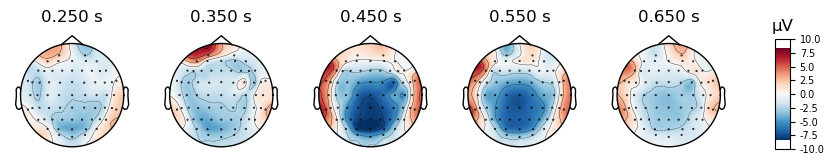

In [21]:
# use `plot_topomap` to see the evolution of these differences

evoked_diff.plot_topomap(times=[.25, .35, .45, .55, .65]);


## Discussion

- Please write a bullet point or two describing what you found and whether it is what you expected.

Based on the plot above, it appears that auditory events have lower voltage values relative to visual events at the time range between 0.450 and 0.550 seconds following stimulus onset at posterior central electrodes. Additionally, during the same time span, it appears that auditory events have higher voltage values relative to visual events at lateral electrodes near the ears. However, we cannot conclude statistical significance without performing further tests. 

Although I could not get the plot_joint() plots to render, these visuals would have provided further insights into the points of maximal difference between the modalities. 